
Linear Regression Evaluation:
Mean Squared Error (MSE): 140940542.70
R² Score: 0.18

Random Forest Evaluation:
Mean Squared Error (MSE): 62974740.48
R² Score: 0.63
Average Predicted Price (Linear Regression): $18504.86
Average Predicted Price (Random Forest): $18719.58


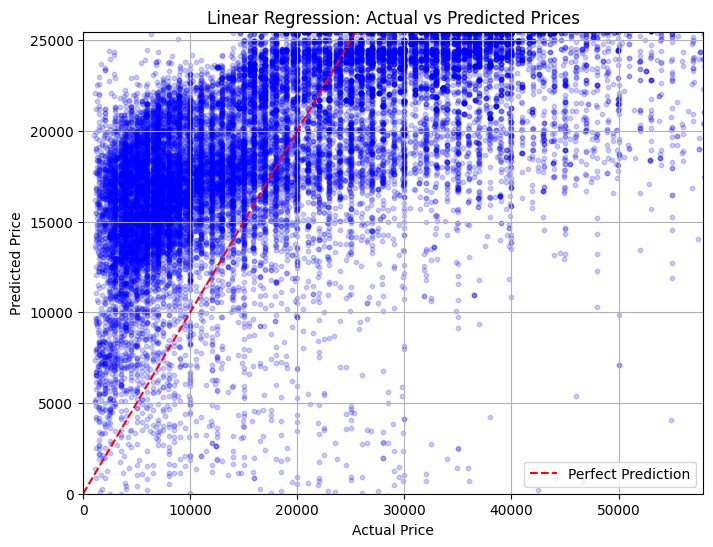

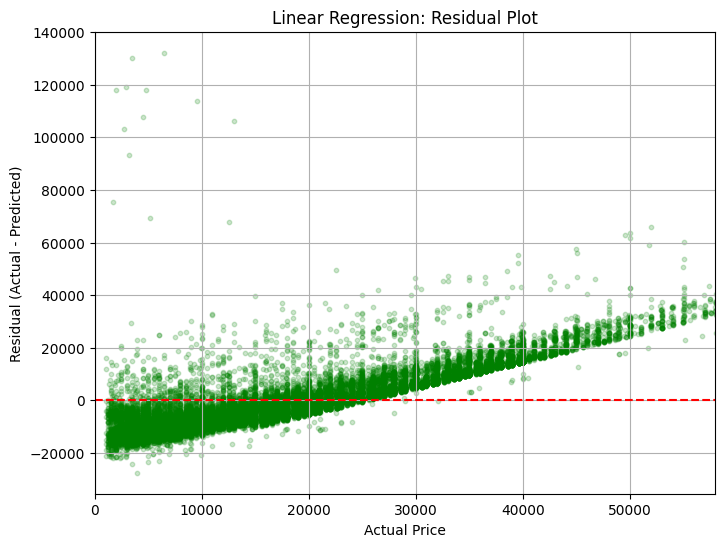

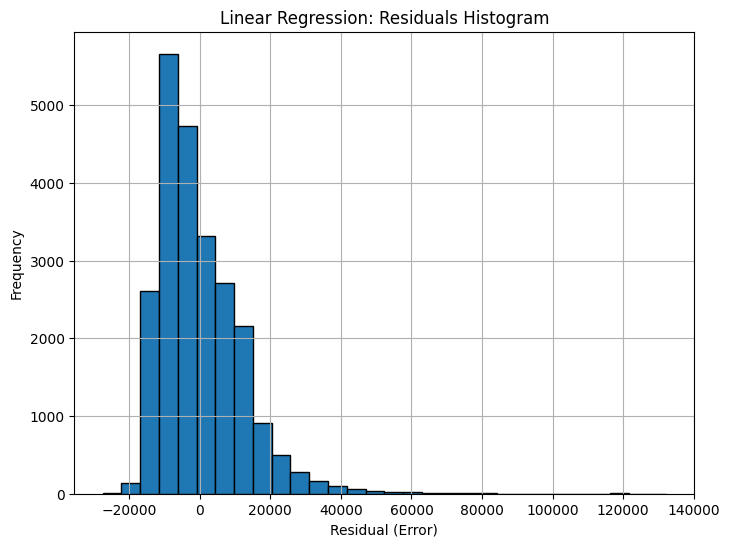

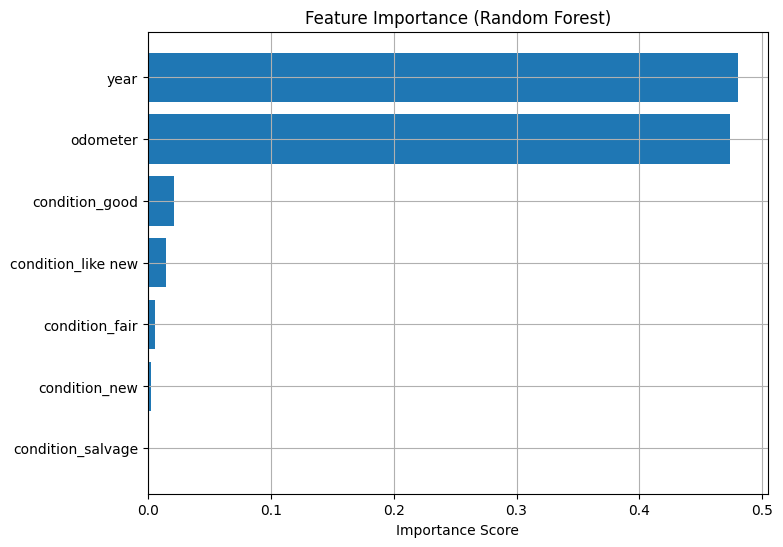

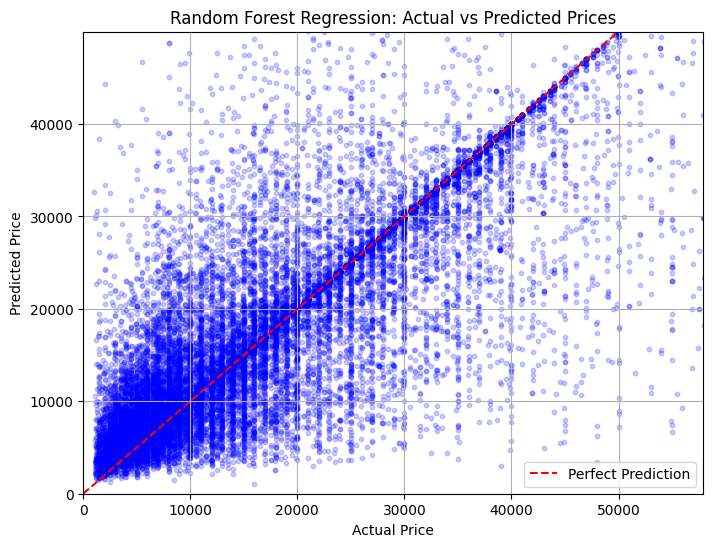

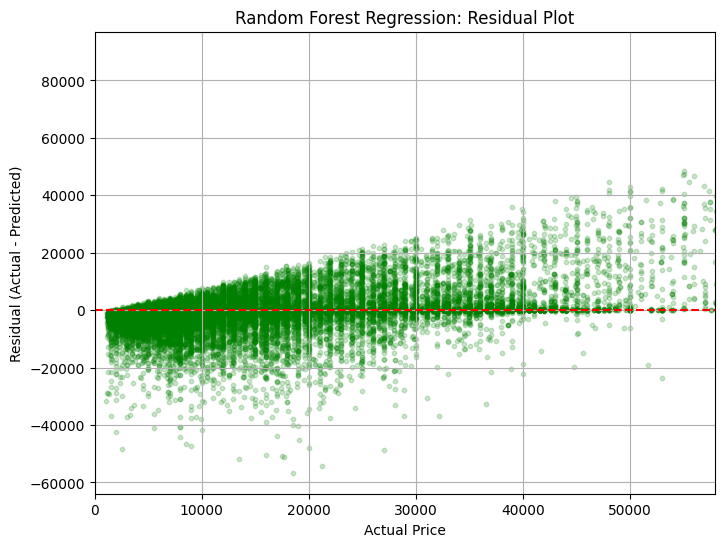

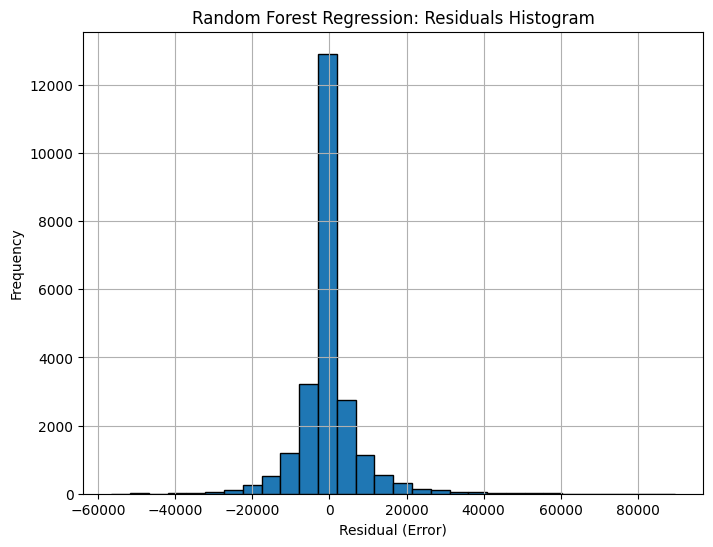

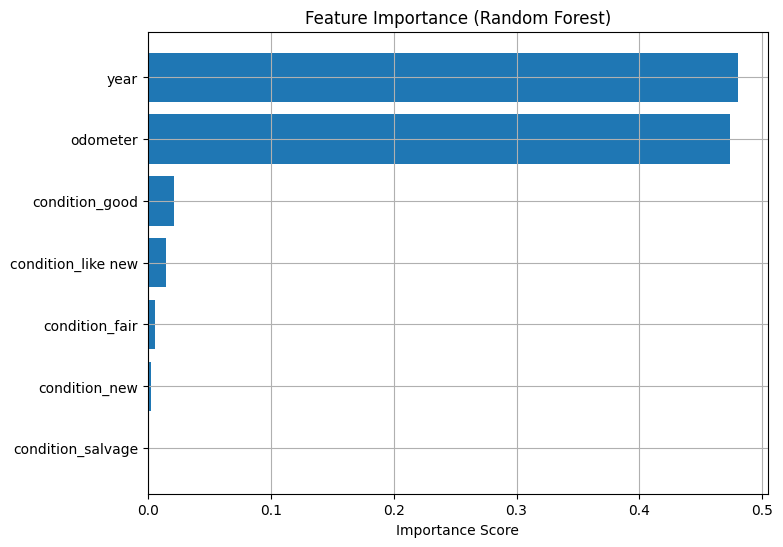

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('vehicles.csv')  
data = data.sample(frac=0.5, random_state=42)

# Remove unrealistic prices
data = data[(data['price'] > 1000) & (data['price'] < 100000)]

# Basic cleaning: drop missing important values
data = data.dropna(subset=['year', 'odometer', 'condition', 'price'])

# Select features and target
# Select features and target
features = data[['year', 'odometer', 'condition']]
target = data['price']

# One-hot encode the 'condition' feature
features = pd.get_dummies(features, columns=['condition'], drop_first=True)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create models
linearModel = LinearRegression()
randomForestModel = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
linearModel.fit(X_train, y_train)
randomForestModel.fit(X_train, y_train)

# Predictions
predLinear = linearModel.predict(X_test)
predRF = randomForestModel.predict(X_test)

# Evaluate models
mseLinear = mean_squared_error(y_test, predLinear)
r2Linear = r2_score(y_test, predLinear)

mse_rf = mean_squared_error(y_test, predRF)
r2_rf = r2_score(y_test, predRF)

print("\nLinear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mseLinear:.2f}")
print(f"R² Score: {r2Linear:.2f}")

print("\nRandom Forest Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

# Average of Linear Regression predictions
avgLinear = np.mean(predLinear)
print(f"Average Predicted Price (Linear Regression): ${avgLinear:.2f}")

# Average of Random Forest predictions
avgRF = np.mean(predRF)
print(f"Average Predicted Price (Random Forest): ${avgRF:.2f}")


# Function to plot results
def plot_model_results(y_true, y_pred, model_name):
    x_limit = np.percentile(y_true, 99)
    y_limit = np.percentile(y_pred, 99)

    # Scatter plot with smaller points and transparency
    plt.figure(figsize=(8,6))
    plt.scatter(y_true, y_pred, alpha=0.2, s=10, color='blue')
    plt.plot([0, x_limit], [0, x_limit], color='red', linestyle='--', label='Perfect Prediction')
    plt.xlim(0, x_limit)
    plt.ylim(0, y_limit)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{model_name}: Actual vs Predicted Prices')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Residual plot
    residuals = y_true - y_pred
    plt.figure(figsize=(8,6))
    plt.scatter(y_true, residuals, alpha=0.2, s=10, color='green')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlim(0, x_limit)
    plt.xlabel('Actual Price')
    plt.ylabel('Residual (Actual - Predicted)')
    plt.title(f'{model_name}: Residual Plot')
    plt.grid(True)
    plt.show()

    # Histogram of residuals
    plt.figure(figsize=(8,6))
    plt.hist(residuals, bins=30, edgecolor='black')
    plt.xlabel('Residual (Error)')
    plt.ylabel('Frequency')
    plt.title(f'{model_name}: Residuals Histogram')
    plt.grid(True)
    plt.show()

    # Feature Importance Plot
    importances = randomForestModel.feature_importances_
    feature_names = features.columns

    # Sort the features by importance
    sorted_idx = np.argsort(importances)

    plt.figure(figsize=(8, 6))
    plt.barh(feature_names[sorted_idx], importances[sorted_idx])
    plt.xlabel('Importance Score')
    plt.title('Feature Importance (Random Forest)')
    plt.grid(True)
    plt.show()


# Plot results for Linear Regression
plot_model_results(y_test, predLinear, 'Linear Regression')

# Plot results for Random Forest
plot_model_results(y_test, predRF, 'Random Forest Regression')
